<h1 style ="color: black; background-color:yellow; font-family:Comic Sans MS;" align = "center"> A Comprehensive Analysis of Flipkart's Shoe Data </h1>

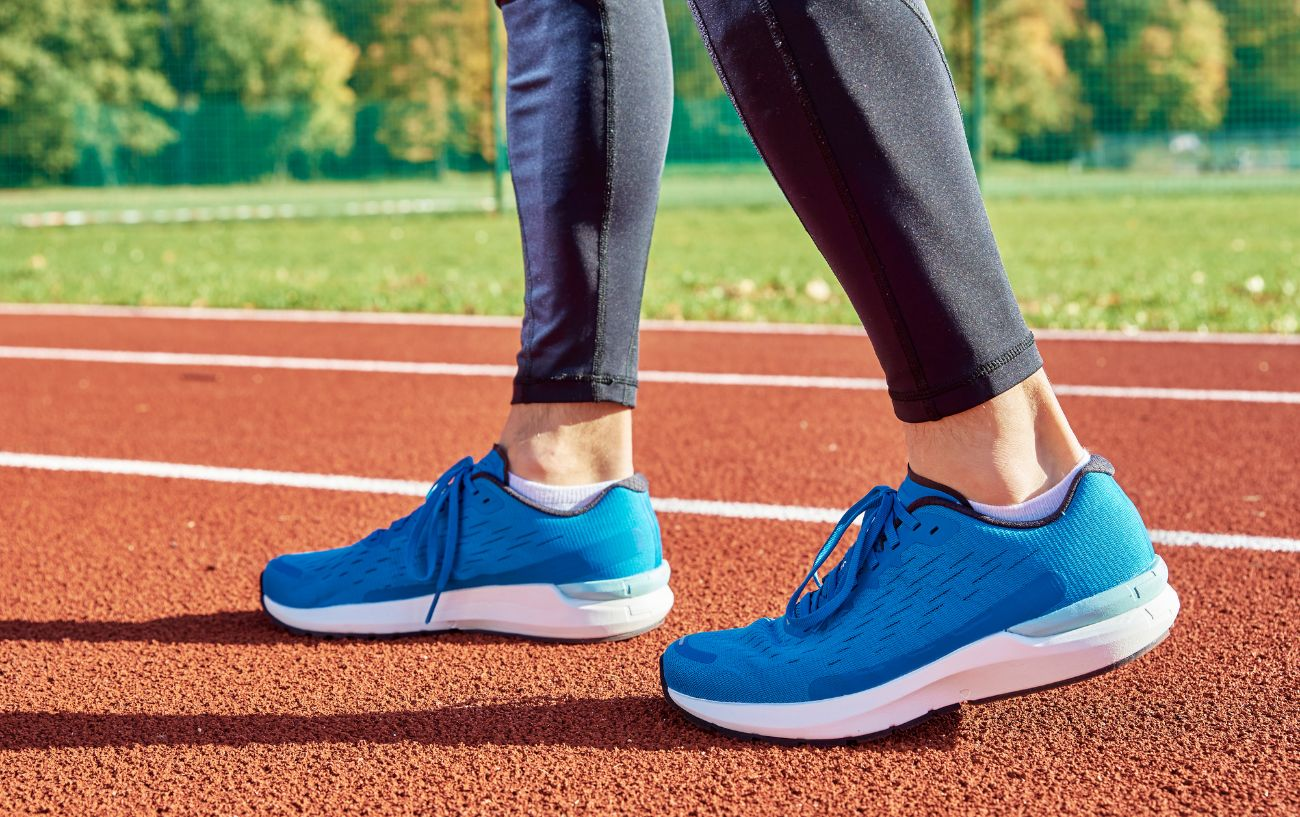

### Scenario for Educational Purposes:

> Please note that the following scenario is fictional and created for educational purposes only.

### Scenario: Data Analysis for Flipkart's Shoe Sales Optimization

Flipkart, a leading online marketplace, approached Innomatic Research Lab seeking assistance in optimizing their shoe sales. Understanding the potential of data analysis, they sought insights to improve their shoe offerings and drive timely purchases.

To address their needs, Innomatic Research Lab assigned Bahram Durani, a skilled data analyst, to work individually on the project. Bahram embarked on a comprehensive analysis of Flipkart's shoe dataset, aiming to uncover actionable insights.

Flipkart provided Bahram with a vast dataset containing information on shoe brands, sponsorship status, regular and final prices, discount percentages, product descriptions, and gender categorizations. Armed with this data, Bahram began exploring and analyzing the various aspects.

### Task for the project:

1. Web Scraping: 

* Extract shoes data for both Male and Female from the Flipkart website using web scraping techniques. You can use Python libraries like BeautifulSoup or Selenium to scrape the required data.

2. Data Extraction: 
* Extract relevant information such as brand, price, gender, etc., for each shoe and store it in a structured format.

3. Save as CSV: 
* Convert the extracted data into a CSV file for further analysis and manipulation. You can use the pandas library in Python to create and save the DataFrame as a CSV file.

4. Data Cleaning: 
* Perform data cleaning to ensure the data is in a consistent and usable format. This may involve handling missing values, removing duplicates, standardizing data types, and addressing any inconsistencies or errors in the data.

5. Data Understanding: 
* Conduct exploratory data analysis (EDA) to gain insights into the dataset. Analyze the data to answer questions such as:

        * What are the most renowned shoe brands based on frequency or popularity?
        * Are there any correlations between variables such as brand and price?
        * What are the distribution and summary statistics of the shoe prices?

6. Data Visualization: 

* Create visualizations, such as bar plots, histograms, box plots, or heatmaps, to present the findings and patterns discovered during the data analysis. Visualizations can help in understanding the data better and communicating the insights to stakeholders effectively.


## Dataset

#### Rows Information

* The data set is consists of 2000 rows.

#### Columns information

* The data set is consists of 7 columns namely: brand, sponsored, regular_price, final_price, discount_percentage, product_description and gender.

#### Here's an explanation of each column in the shoes dataset:

1. `brand`: This column represents the brand or manufacturer of the shoe. It indicates the company or label that produces the footwear.

2. `sponsored`: This column indicates whether a particular shoe listing is sponsored or not. It could be a binary value where '1' indicates that the shoe is sponsored, meaning it is a paid advertisement or promotion, and '0' indicates that it is not sponsored.

3. `regular_price`: This column specifies the regular or original price of the shoe before any discounts or promotions. It represents the standard price at which the shoe is typically sold.

4. `final_price`: This column denotes the final price of the shoe after applying any discounts, promotions, or special offers. It reflects the actual price that customers have to pay for the shoe.

5. `discount_percentage`: This column shows the percentage of discount applied to the shoe. It calculates the difference between the regular price and the final price as a percentage of the regular price. It provides an insight into the amount of savings a customer can enjoy.

6. `product_description`: This column contains a description or details about the shoe. It may include information about the shoe's features, materials used, design elements, or any other relevant information that helps describe the product.

7. `gender`: This column indicates the intended gender for which the shoe is designed. It categorizes the shoe as either 'Male', 'Female', or potentially 'Unisex' if the shoe is suitable for both genders. It helps in filtering and analyzing shoes based on gender preferences.

In [1]:
import pandas as pd                          # Importing the Pandas library for data manipulation and analysis
import numpy as np                          # Importing NumPy for numerical operations 
import matplotlib.pyplot as plt            # Importing Matplotlib for data visualization
import seaborn as sns                     # Importing Seaborn for statistical data visualization

import re                                # Importing the 're' module for regular expressions
import requests                         # Importing the 'requests' module for making HTTP requests
from bs4 import BeautifulSoup          # Importing BeautifulSoup for web scraping
import time                           # Importing the 'time' module for time-related functions

from selenium import webdriver                           # Importing Selenium for web automation
from selenium.webdriver.firefox.service import Service   # Importing Service class for configuring the Firefox WebDriver
from selenium.webdriver.firefox.options import Options   # Importing Options class for configuring options for the Firefox WebDriver

### 1. Data Extraction

In [2]:
path = r'C:\Users\KIIT\OneDrive - kiit.ac.in\Desktop\Books\AI-ML\Innomatics_Python\geckodriver.exe'

service = Service(execuatble_path = path)
options = Options()
print(path)

C:\Users\KIIT\OneDrive - kiit.ac.in\Desktop\Books\AI-ML\Innomatics_Python\geckodriver.exe


In [3]:
driver = webdriver.Firefox(service=service, options=options)

url = 'https://www.flipkart.com/search?q=shoes+for+men&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=3'
driver.get(url)
print(url)

https://www.flipkart.com/search?q=shoes+for+men&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=3


In [50]:
soup = BeautifulSoup(driver.page_source, 'html.parser')
soup

<html lang="en"><head><script async="async" src="https://dpm.demdex.net/id?d_visid_ver=1.5.4&amp;d_rtbd=json&amp;d_ver=2&amp;d_orgid=17EB401053DAF4840A490D4C%40AdobeOrg&amp;d_nsid=0&amp;d_mid=36798588357862870880667542272330949965&amp;d_cb=s_c_il%5B0%5D._setAudienceManagerFields" type="text/javascript"></script><script async="async" src="https://flipkart.d1.sc.omtrdc.net/id?d_visid_ver=1.5.4&amp;callback=s_c_il%5B0%5D._setAnalyticsFields&amp;mcorgid=17EB401053DAF4840A490D4C%40AdobeOrg&amp;mid=36798588357862870880667542272330949965" type="text/javascript"></script><script async="async" src="https://dpm.demdex.net/id?d_visid_ver=1.5.4&amp;d_rtbd=json&amp;d_ver=2&amp;d_orgid=17EB401053DAF4840A490D4C%40AdobeOrg&amp;d_nsid=0&amp;d_cb=s_c_il%5B0%5D._setMarketingCloudFields" type="text/javascript"></script><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/><

### Extracting data for men's shoe 

In [3]:
sponsored = []
brand = []
final_price = []
regular_price = []
discount_percentage = []
product_description = []
images = []

# Set up Chrome WebDriver
driver =  webdriver.Firefox(service=service, options=options)

for i in range(1, 32):
    url = f'https://www.flipkart.com/search?q=shoes+for+men&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={i}'
    print(url)
    driver.get(url)
    time.sleep(3)  # Wait for the page to load

    # Scroll to the bottom of the page to load all content
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)  # Wait for the page to load completely

    # Extract the content using BeautifulSoup
    soup = BeautifulSoup(driver.page_source, 'html.parser')

    for item in soup.find_all('div', class_="_2B099V"):
        # sponsored
        s = item.find('div', class_="_2I5qvP")
        if s is None:
            sponsored.append(0)
        else:
            sponsored.append(1)

        # brand
        b = item.find('div', class_="_2WkVRV")
        if b:
            brand.append(b.text)
        else:
            brand.append(np.nan)

        # final_price
        fp = item.find('div', class_="_30jeq3")
        reg = re.findall('\d+', fp.text)
        if reg:
            final_price.append(reg[0])
        else:
            final_price.append(np.nan)

        # regular_price
        rp = item.find('div', class_="_3I9_wc")
        
        if rp:
            regular_price.append(rp.text)
        else:
            regular_price.append(np.nan)

        # discount_percentage
        dp = item.find('div', class_="_3Ay6Sb")
        if dp:
            discount_percentage.append(dp.text)
        else:
            discount_percentage.append(np.nan)

        # product_description
        prd = item.find('a', class_="IRpwTa").text
        if prd:
            product_description.append(prd)
        else:
            product_description.append(np.nan)

# Check the lengths of the lists after the loop
print(len(sponsored))
print(len(brand))
print(len(final_price))
print(len(regular_price))
print(len(discount_percentage))
print(len(product_description))

# Close the WebDriver
driver.quit()

https://www.flipkart.com/search?q=shoes+for+men&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=1
https://www.flipkart.com/search?q=shoes+for+men&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=2
https://www.flipkart.com/search?q=shoes+for+men&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=3
https://www.flipkart.com/search?q=shoes+for+men&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=4
https://www.flipkart.com/search?q=shoes+for+men&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=5
https://www.flipkart.com/search?q=shoes+for+men&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=6
https://www.flipkart.com/search?q=shoes+for+men&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=7
https://www.flipkart.com/search?q=shoes+for+men&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=o

In [24]:
df_men = pd.DataFrame({ 'brand': brand,  'sponsored': sponsored, 'regular_price':regular_price, 'final_price': final_price, 
                'discount_percentage': discount_percentage, 'product_description': product_description })
df

,brand,sponsored,regular_price,final_price,discount_percentage,product_description
0,BOLLERO,1,"₹3,499",666,80% off,Men's Grey High Top Shoes High Tops For Men
1,Zixer,1,"₹2,999",615,79% off,Men's High Top Ankle Retro Air Original Sneake...
2,BRUTON,0,"₹1,299",299,76% off,Trendy Running Shoes Running Shoes For Men
3,HOTSTYLE,0,₹999,239,76% off,Trendy & Stylish Running Shoes For Men
4,BRUTON,0,"₹1,299",229,82% off,Modern Trendy Sneakers Shoes Sneakers For Men
...,...,...,...,...,...,...
995,TPENT,0,"₹1,299",424,67% off,STYLISH LIGHT WEIGHT SPORTS SHOES FOR BOYS Sli...
996,Kraasa,0,₹999,426,57% off,"Casuals, Canvas, Partywear Sneakers For Men"
997,ADIDAS,0,"₹2,999",1,55% off,Glenn M Running Shoes For Men
998,Wildcraft,0,"₹3,999",1,55% off,Volga NX Hiking & Trekking Shoes For Men


In [25]:
df_men.to_csv('C:\\Users\\KIIT\OneDrive - kiit.ac.in\Desktop\Books\AI-ML\Innomatics_Python\Datasets\shoes_data.csv', index = False)

In [33]:
df_men['gender'] = 'Male'
df_men

,brand,sponsored,regular_price,final_price,discount_percentage,product_description,gender
0,BOLLERO,1,"₹3,499",666,80% off,Men's Grey High Top Shoes High Tops For Men,Male
1,Zixer,1,"₹2,999",615,79% off,Men's High Top Ankle Retro Air Original Sneake...,Male
2,BRUTON,0,"₹1,299",299,76% off,Trendy Running Shoes Running Shoes For Men,Male
3,HOTSTYLE,0,₹999,239,76% off,Trendy & Stylish Running Shoes For Men,Male
4,BRUTON,0,"₹1,299",229,82% off,Modern Trendy Sneakers Shoes Sneakers For Men,Male
...,...,...,...,...,...,...,...
995,TPENT,0,"₹1,299",424,67% off,STYLISH LIGHT WEIGHT SPORTS SHOES FOR BOYS Sli...,Male
996,Kraasa,0,₹999,426,57% off,"Casuals, Canvas, Partywear Sneakers For Men",Male
997,ADIDAS,0,"₹2,999",1,55% off,Glenn M Running Shoes For Men,Male
998,Wildcraft,0,"₹3,999",1,55% off,Volga NX Hiking & Trekking Shoes For Men,Male


### Extracting data for women's shoe 

In [27]:
sponsored = []
brand = []
final_price = []
regular_price = []
discount_percentage = []
product_description = []
images = []

# Set up Chrome WebDriver
driver =  webdriver.Firefox(service=service, options=options)

for i in range(1, 32):
    url = f'https://www.flipkart.com/search?q=shoe%20for%20women&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={i}'
    print(url)
    driver.get(url)
    time.sleep(3)  # Wait for the page to load

    # Scroll to the bottom of the page to load all content
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)  # Wait for the page to load completely

    # Extract the content using BeautifulSoup
    soup = BeautifulSoup(driver.page_source, 'html.parser')

    for item in soup.find_all('div', class_="_2B099V"):
        # sponsored
        s = item.find('div', class_="_2I5qvP")
        if s is None:
            sponsored.append(0)
        else:
            sponsored.append(1)

        # brand
        b = item.find('div', class_="_2WkVRV")
        if b:
            brand.append(b.text)
        else:
            brand.append(np.nan)

        # final_price
        fp = item.find('div', class_="_30jeq3")
        reg = re.findall('\d+', fp.text)
        if reg:
            final_price.append(reg[0])
        else:
            final_price.append(np.nan)

        # regular_price
        rp = item.find('div', class_="_3I9_wc")
        
        if rp:
            regular_price.append(rp.text)
        else:
            regular_price.append(np.nan)

        # discount_percentage
        dp = item.find('div', class_="_3Ay6Sb")
        if dp:
            discount_percentage.append(dp.text)
        else:
            discount_percentage.append(np.nan)

        # product_description
        prd = item.find('a', class_="IRpwTa").text
        if prd:
            product_description.append(prd)
        else:
            product_description.append(np.nan)

# Check the lengths of the lists after the loop
print(len(sponsored))
print(len(brand))
print(len(final_price))
print(len(regular_price))
print(len(discount_percentage))
print(len(product_description))

# Close the WebDriver
driver.quit()

https://www.flipkart.com/search?q=shoe%20for%20women&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=1
https://www.flipkart.com/search?q=shoe%20for%20women&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=2
https://www.flipkart.com/search?q=shoe%20for%20women&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=3
https://www.flipkart.com/search?q=shoe%20for%20women&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=4
https://www.flipkart.com/search?q=shoe%20for%20women&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=5
https://www.flipkart.com/search?q=shoe%20for%20women&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=6
https://www.flipkart.com/search?q=shoe%20for%20women&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=7
https://www.flipkart.com/search?q=shoe%20for%20women&otracker=search&otracke

In [28]:
df_women = pd.DataFrame({ 'brand': brand,  'sponsored': sponsored, 'regular_price':regular_price, 'final_price': final_price, 
                'discount_percentage': discount_percentage, 'product_description': product_description })
df_women 

,brand,sponsored,regular_price,final_price,discount_percentage,product_description
0,Footup,1,"₹1,299",299,76% off,Mesh|Lightweight|Comfort|Winter Season|Trendy|...
1,Footox,1,₹999,309,69% off,Casual Shoes Sneakers For Women
2,Layasa,0,"₹1,999",460,76% off,Stylish Casual Sports Shoe Sneakers Training &...
3,CAMPUS,0,"₹1,099",499,54% off,LISA (N) Casuals For Women
4,Deals4you,0,₹999,299,70% off,Sneakers For Women
...,...,...,...,...,...,...
995,ORICUM,0,₹999,229,77% off,Oricum Casual Walking Gym Training outdoor sne...
996,Z Blue,0,"₹4,999",1,67% off,NEW Z BLUE OGIY RETRO SHOES HIGH PREMIUM QUALI...
997,Skechers,0,"₹5,999",3,45% off,GO WALK JOY -WONDERFUL SPRING Sneakers For Women
998,RED TAPE,0,"₹5,599",1,70% off,Walking Sports Shoes for Women | Soft Cushione...


In [29]:
df_women.to_csv('C:\\Users\\KIIT\OneDrive - kiit.ac.in\Desktop\Books\AI-ML\Innomatics_Python\Datasets\women_shoes_data.csv', index = False)

In [34]:
df_women['gender'] = 'female'
df_women

,brand,sponsored,regular_price,final_price,discount_percentage,product_description,gender
0,Footup,1,"₹1,299",299,76% off,Mesh|Lightweight|Comfort|Winter Season|Trendy|...,female
1,Footox,1,₹999,309,69% off,Casual Shoes Sneakers For Women,female
2,Layasa,0,"₹1,999",460,76% off,Stylish Casual Sports Shoe Sneakers Training &...,female
3,CAMPUS,0,"₹1,099",499,54% off,LISA (N) Casuals For Women,female
4,Deals4you,0,₹999,299,70% off,Sneakers For Women,female
...,...,...,...,...,...,...,...
995,ORICUM,0,₹999,229,77% off,Oricum Casual Walking Gym Training outdoor sne...,female
996,Z Blue,0,"₹4,999",1,67% off,NEW Z BLUE OGIY RETRO SHOES HIGH PREMIUM QUALI...,female
997,Skechers,0,"₹5,999",3,45% off,GO WALK JOY -WONDERFUL SPRING Sneakers For Women,female
998,RED TAPE,0,"₹5,599",1,70% off,Walking Sports Shoes for Women | Soft Cushione...,female


In [38]:
# Concatenate the two DataFrames

combined_df = pd.concat([df_men, df_women], ignore_index=True)
combined_df.to_csv('C:\\Users\\KIIT\OneDrive - kiit.ac.in\Desktop\Books\AI-ML\Innomatics_Python\Datasets\combined_shoes_data.csv', index = False)
combined_df

,brand,sponsored,regular_price,final_price,discount_percentage,product_description,gender
0,BOLLERO,1,"₹3,499",666,80% off,Men's Grey High Top Shoes High Tops For Men,Male
1,Zixer,1,"₹2,999",615,79% off,Men's High Top Ankle Retro Air Original Sneake...,Male
2,BRUTON,0,"₹1,299",299,76% off,Trendy Running Shoes Running Shoes For Men,Male
3,HOTSTYLE,0,₹999,239,76% off,Trendy & Stylish Running Shoes For Men,Male
4,BRUTON,0,"₹1,299",229,82% off,Modern Trendy Sneakers Shoes Sneakers For Men,Male
...,...,...,...,...,...,...,...
1995,ORICUM,0,₹999,229,77% off,Oricum Casual Walking Gym Training outdoor sne...,female
1996,Z Blue,0,"₹4,999",1,67% off,NEW Z BLUE OGIY RETRO SHOES HIGH PREMIUM QUALI...,female
1997,Skechers,0,"₹5,999",3,45% off,GO WALK JOY -WONDERFUL SPRING Sneakers For Women,female
1998,RED TAPE,0,"₹5,599",1,70% off,Walking Sports Shoes for Women | Soft Cushione...,female


## 2. Data Cleaning

* Step 1: Importing the dataset
* Step 2: Exploring Data
* Step 3: Standardizing Data
* Step 4: Handling Missing Values
* Step 5: Handling Duplicates
* Step 6: Handling outliers

#### Step 1: Importing the dataset

In [30]:
df = pd.read_csv('C:\\Users\\KIIT\OneDrive - kiit.ac.in\Desktop\Books\AI-ML\Innomatics_Python\Datasets\combined_shoes_data.csv')

In [31]:
# display the first 5 rows in DataFrame: dataset
df.head()

,brand,sponsored,regular_price,final_price,discount_percentage,product_description,gender
0,BOLLERO,1,"₹3,499",666,80% off,Men's Grey High Top Shoes High Tops For Men,Male
1,Zixer,1,"₹2,999",615,79% off,Men's High Top Ankle Retro Air Original Sneake...,Male
2,BRUTON,0,"₹1,299",299,76% off,Trendy Running Shoes Running Shoes For Men,Male
3,HOTSTYLE,0,₹999,239,76% off,Trendy & Stylish Running Shoes For Men,Male
4,BRUTON,0,"₹1,299",229,82% off,Modern Trendy Sneakers Shoes Sneakers For Men,Male


In [32]:
# display last five rows of the DataFrame: df
df.tail()

,brand,sponsored,regular_price,final_price,discount_percentage,product_description,gender
1995,ORICUM,0,₹999,229,77% off,Oricum Casual Walking Gym Training outdoor sne...,female
1996,Z Blue,0,"₹4,999",1,67% off,NEW Z BLUE OGIY RETRO SHOES HIGH PREMIUM QUALI...,female
1997,Skechers,0,"₹5,999",3,45% off,GO WALK JOY -WONDERFUL SPRING Sneakers For Women,female
1998,RED TAPE,0,"₹5,599",1,70% off,Walking Sports Shoes for Women | Soft Cushione...,female
1999,SUKUN,0,₹999,449,55% off,Walking Shoes For Women,female


#### Step 2: Exploring the  data

In [5]:
# Check the number of rows and  number of columns in Pandas DataFrame: df
df.shape

(2000, 7)

In [6]:
# check the row index labels of Pandas DataFrame: df
df.index

RangeIndex(start=0, stop=2000, step=1)

In [7]:
# Check the column labels of Pandas DataFrame: df
df.columns

Index(['brand', 'sponsored', 'regular_price', 'final_price',
       'discount_percentage', 'product_description', 'gender'],
      dtype='object')

In [8]:
# Get the concise summary of DataFrame: df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   brand                2000 non-null   object
 1   sponsored            2000 non-null   int64 
 2   regular_price        1985 non-null   object
 3   final_price          2000 non-null   int64 
 4   discount_percentage  1984 non-null   object
 5   product_description  2000 non-null   object
 6   gender               2000 non-null   object
dtypes: int64(2), object(5)
memory usage: 109.5+ KB


#### Step 3: Standardizing Data:

* Perform data standardization and cleaning operations based on specific requirements. This can include tasks like converting units, formatting dates or strings, removing special characters, or dealing with inconsistent data.

In [33]:
df['regular_price'] = df['regular_price'].str.replace('₹', '').str.replace(',', '')
df['regular_price'] = pd.to_numeric(df['regular_price'], errors='coerce')
print('Datatype: ', df['regular_price'].dtype)
print('Null values: ', df['regular_price'].isna().sum())

Datatype:  float64
Null values:  15


In [34]:
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').str.replace('off', '')
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')
print('discount_percentage: ', df['discount_percentage'].dtype)
print('Null values: ', df['discount_percentage'].isna().sum()) 

discount_percentage:  float64
Null values:  16


In [35]:
df.head(2)

,brand,sponsored,regular_price,final_price,discount_percentage,product_description,gender
0,BOLLERO,1,3499.0,666,80.0,Men's Grey High Top Shoes High Tops For Men,Male
1,Zixer,1,2999.0,615,79.0,Men's High Top Ankle Retro Air Original Sneake...,Male


In [36]:
# Get the statistical summary of numeric columns of DataFrame: df
df.describe()

,sponsored,regular_price,final_price,discount_percentage
count,2000.000000,1985.000000,2000.000000,1984.000000
mean,0.082500,2828.252897,335.771000,49.959677
std,0.275194,2299.227226,341.464406,18.133043
min,0.000000,389.000000,1.000000,1.000000
25%,0.000000,999.000000,2.000000,38.000000
50%,0.000000,1899.000000,299.000000,50.000000
75%,0.000000,3999.000000,641.000000,64.250000
max,1.000000,19999.000000,999.000000,88.000000


In [13]:
df.describe(include =  'all')

,brand,sponsored,regular_price,final_price,discount_percentage,product_description,gender
count,2000,2000.000000,1985.000000,2000.000000,1984.000000,2000,2000
unique,204,NaN,NaN,NaN,NaN,1139,2
top,CAMPUS,NaN,NaN,NaN,NaN,Sneakers For Women,Male
freq,227,NaN,NaN,NaN,NaN,50,1000
mean,NaN,0.082500,2828.252897,335.771000,49.959677,NaN,NaN
std,NaN,0.275194,2299.227226,341.464406,18.133043,NaN,NaN
min,NaN,0.000000,389.000000,1.000000,1.000000,NaN,NaN
25%,NaN,0.000000,999.000000,2.000000,38.000000,NaN,NaN
50%,NaN,0.000000,1899.000000,299.000000,50.000000,NaN,NaN
75%,NaN,0.000000,3999.000000,641.000000,64.250000,NaN,NaN


### Step 4: Handling Missing Values

Datasets can contain missing values. This can be handled in 2 ways:

1. Remove missing values. Rows or columns containing missing values can be removed.
2. Replacing the missing values with new values.

In [37]:
# finding missing values using any() in columns of the DataFrame: df
df.isna().any()

brand                  False
sponsored              False
regular_price           True
final_price            False
discount_percentage     True
product_description    False
gender                 False
dtype: bool

In [38]:
# finding the number of missing values in each of the columns of the DataFrame: df
df.isna().sum()

brand                   0
sponsored               0
regular_price          15
final_price             0
discount_percentage    16
product_description     0
gender                  0
dtype: int64

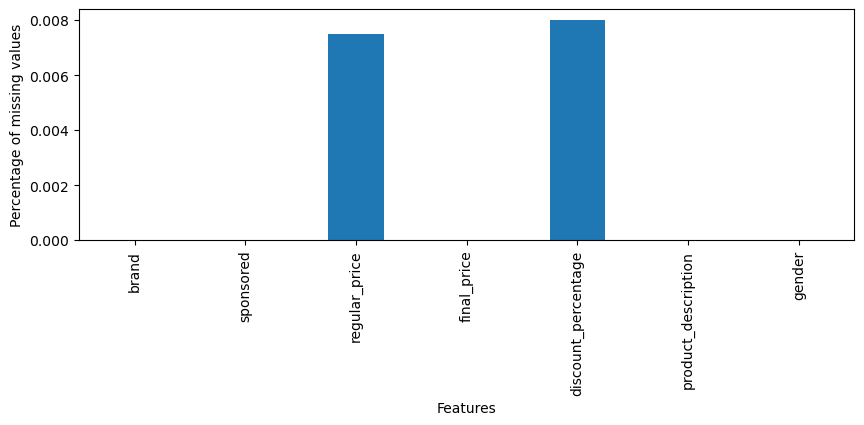

In [39]:
# A bar graph to show the percentage of missing values against each rows

df.isnull().mean().plot.bar(figsize=(10,3))
plt.xlabel("Features")
plt.ylabel("Percentage of missing values")
plt.show()

In [40]:
# Calculate the IQR for 'regular_price' and 'discount_percentage' columns

for col in ['regular_price', 'discount_percentage']:
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define a multiplier to adjust the IQR threshold
    threshold_multiplier = 1.5

    # Calculate the lower and upper bounds for outlier detection
    lower_bound = Q1 - threshold_multiplier * IQR
    upper_bound = Q3 + threshold_multiplier * IQR

    # Check for outliers in each column
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)


    print(f"{col}'s lower_bound: ", lower_bound)
    print(f"{col}'s upper_bound:", upper_bound)

    # Count the number of outliers in each column
    outlier_counts = outliers.sum()

    print(f"{col}'s outlier counts: ",  outlier_counts)
    print()

regular_price's lower_bound:  -3501.0
regular_price's upper_bound: 8499.0
regular_price's outlier counts:  47

discount_percentage's lower_bound:  -1.375
discount_percentage's upper_bound: 103.625
discount_percentage's outlier counts:  0



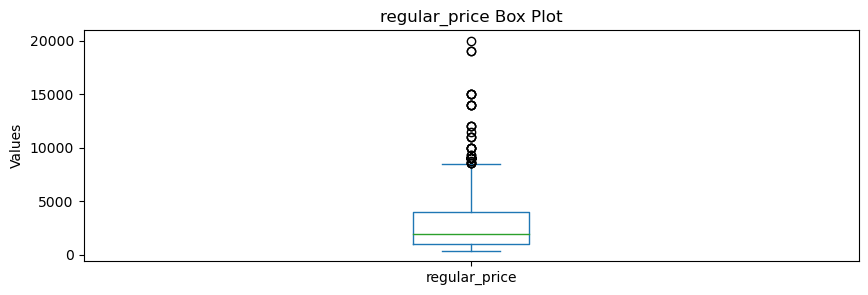

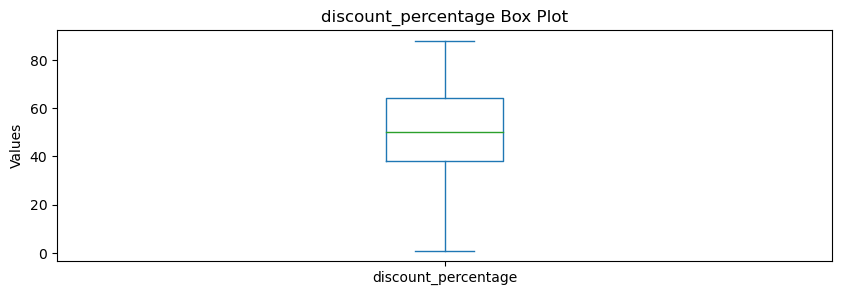

In [41]:
# Plot box plots for each numeric column

numeric_columns = ['regular_price', 'discount_percentage']

for column in numeric_columns:
    plt.figure(figsize=(10, 3))
    df[column].plot(kind='box')    # Plot box plot for non-null values
    plt.title(f'{column} Box Plot')
    plt.ylabel('Values')
    plt.show()

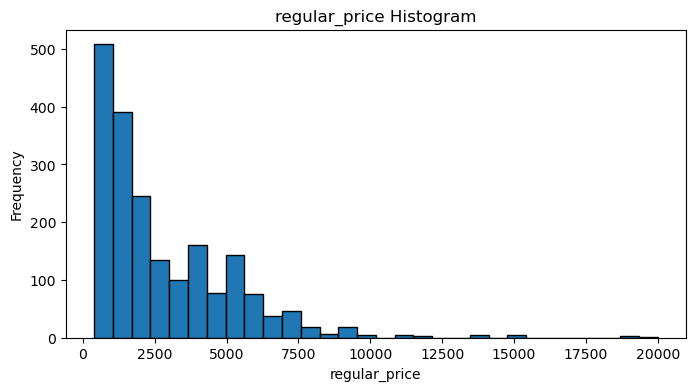

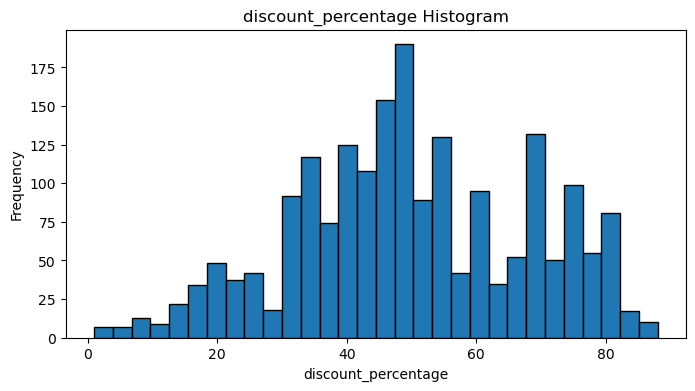

In [42]:
# Plot histograms for each numeric column

numeric_columns = ['regular_price', 'discount_percentage']

for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df[column], bins=30, edgecolor='black')
    plt.title(f'{column} Histogram')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Decision 

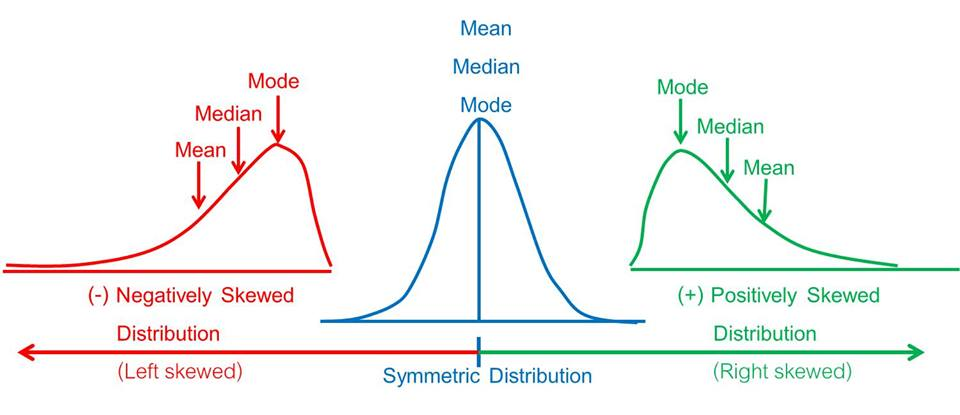


### Regular Price

1.  The regular price feature exhibits 47 outliers, indicating a deviation from the typical values. Additionally, the feature demonstrates positive skewness. Given that the mean is sensitive to outliers, it is advisable to use the median as a more robust measure of central tendency. The median is less influenced by extreme values and skewed distributions, making it a suitable choice for filling null values. The median represents the value that separates the higher half from the lower half of the data.

### Discount  Percentage

1. The discount percentage feature shows no outliers and follows a normal distribution. In this case, filling null values with the mean is a suitable choice. The mean represents the average value and is appropriate for data that follows a normal distribution. By using the mean, we can maintain the overall pattern of the data and ensure a representative estimate for the missing values in this feature.




In [43]:
# Replace the null values with median 

median_value = df["regular_price"].median()
df["regular_price"].fillna(median_value, inplace=True)

In [44]:
# Replace the null values with mean

mean_value = df["discount_percentage"].mean()
df["discount_percentage"].fillna(mean_value, inplace=True)

In [45]:
# Checking whether the null values replaced with their mean and median 
df.isna().sum()

brand                  0
sponsored              0
regular_price          0
final_price            0
discount_percentage    0
product_description    0
gender                 0
dtype: int64

### Step 5: Handling Duplicates

In [46]:
# find the number of duplicate records the DataFrame: df
df.duplicated().sum()

377

In [47]:
# get the duplicate records in the DataFrame: df
df[df.duplicated()]

,brand,sponsored,regular_price,final_price,discount_percentage,product_description,gender
19,CAMPUS,0,1699.0,1,35.0,MIKE (N) Running Shoes For Men,Male
23,BRUTON,0,1299.0,299,76.0,Trendy Sports Running Running Shoes For Men,Male
25,BRUTON,0,1299.0,299,76.0,Trendy Sports Running Running Shoes For Men,Male
28,BIRDE,0,999.0,279,72.0,Premium Sports Shoes for Men Walking Shoes For...,Male
52,HOTSTYLE,0,999.0,239,76.0,Trendy & Stylish Loafers For Men,Male
...,...,...,...,...,...,...,...
1935,RED TAPE,0,5499.0,1,70.0,Sneakers For Women,female
1956,Kraasa,0,999.0,499,50.0,Addiction Walking Shoes For Women,female
1957,SHOETOPIA,0,1999.0,589,70.0,Sneakers For Women,female
1977,K- FOOTLANCE,0,999.0,429,57.0,Stylish Walking Partywear Sneakers Casual Shoe...,female


In [48]:
# Removing the duplicate values

df = df.drop_duplicates()

In [49]:
# Checking whether the duplicate records have been removed from the  DataFrame: df
df.duplicated().sum()

0

### Step 6: Handling outliers

In [50]:
# Outlier detection using IQR  for numeric columns 

def outlier_detection(df, column):
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define a multiplier to adjust the IQR threshold
    threshold_multiplier = 1.5

    # Calculate the lower and upper bounds for outlier detection
    lower_bound = Q1 - threshold_multiplier * IQR
    upper_bound = Q3 + threshold_multiplier * IQR

    # Check for outliers in each column
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)


    # Count the number of outliers in each column
    outlier_counts = outliers.sum()

    print(f"{col}'s outlier counts: ",  outlier_counts)


In [51]:
# function to detect outliers 

for col in df.select_dtypes(include='number').columns:
    outlier_detection(df, col)

sponsored's outlier counts:  156
regular_price's outlier counts:  38
final_price's outlier counts:  0
discount_percentage's outlier counts:  0


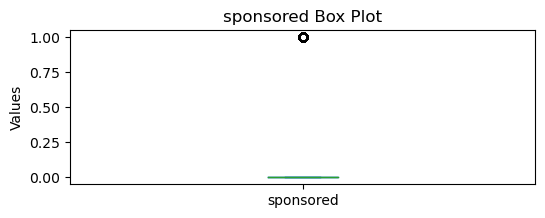

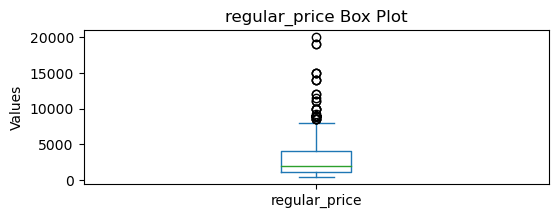

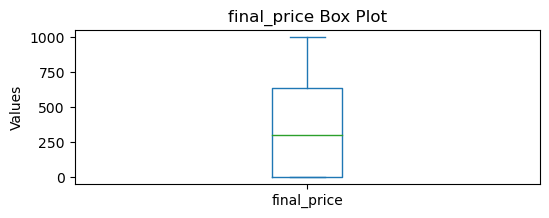

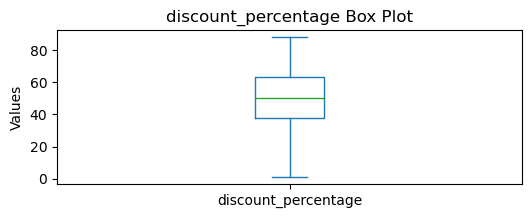

In [52]:
# Plot box plots for each numeric column

numeric_columns = df.select_dtypes(include='number').columns

for column in numeric_columns:
    plt.figure(figsize=(6, 2))
    df[column].plot(kind='box')    
    plt.title(f'{column} Box Plot')
    plt.ylabel('Values')
    plt.show()
    

##  Decision:  

* Based on the box plots and the number of outliers, we can make decisions regarding the "sponsored" and the "regular_price" features. Considering the "sponsored" feature, which only has values of 1 and 0, we cannot consider it as an outlier since it represents a categorical variable rather than a numerical one.

* However, for the "regular_price" feature, we observed 38 outliers based on the box plots. To handle these outliers, we can replace them with the upper and lower bounds.

In [53]:
def find_outlier_limits(col_name):
    
    Q1,Q3= df[col_name].quantile([.25,.75]) # Q1 --> first quartile 25% of data. Q3 --> third quartile 75% of data
    IQR = Q3-Q1                   # Inter quartile range
    lower = Q1-(1.5* IQR)              
    upper = Q3+(1.5* IQR)
    return (upper,lower)


upper_reg_price,lower_reg_price = find_outlier_limits('regular_price')
print('Regular price:','upper limit: ',upper_reg_price,' lower limit: ',lower_reg_price)

# Replacing outlier values with respective upper and lower limits

df.loc[df['regular_price']> upper_reg_price ,'regular_price'] = upper_reg_price
df.loc[df['regular_price']< lower_reg_price,'regular_price'] = lower_reg_price


Regular price: upper limit:  8424.0  lower limit:  -3376.0


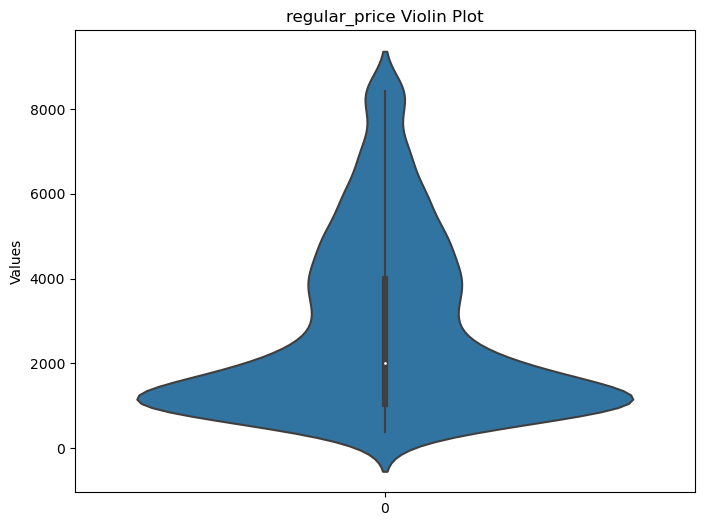

In [54]:
# checking whether the outliers replacement have successfully done or no

col = 'regular_price'

plt.figure(figsize=(8, 6))
sns.violinplot(data=df[col])
plt.title(f'{col} Violin Plot')
plt.ylabel('Values')
plt.show()

### Step7: Handling invalid values

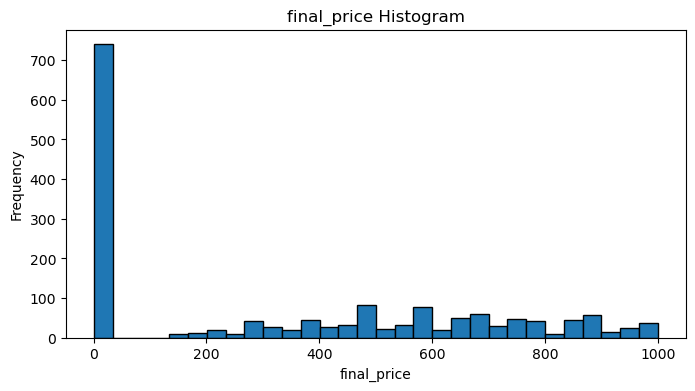

In [55]:
# Plot histograms for final_price column

plt.figure(figsize=(8, 4))
plt.hist(df['final_price'], bins=30, edgecolor='black')

plt.title('final_price Histogram')
plt.xlabel('final_price')
plt.ylabel('Frequency')
plt.show()

In [56]:
# Replace the invalid values with median 

# List of values to be replaced
replace_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Replace values with the median of the "final_price" column
df["final_price"].replace(replace_values, df["final_price"].mean(), inplace=True)

# Verify the changes
df

,brand,sponsored,regular_price,final_price,discount_percentage,product_description,gender
0,BOLLERO,1,3499.0,666.000000,80.0,Men's Grey High Top Shoes High Tops For Men,Male
1,Zixer,1,2999.0,615.000000,79.0,Men's High Top Ankle Retro Air Original Sneake...,Male
2,BRUTON,0,1299.0,299.000000,76.0,Trendy Running Shoes Running Shoes For Men,Male
3,HOTSTYLE,0,999.0,239.000000,76.0,Trendy & Stylish Running Shoes For Men,Male
4,BRUTON,0,1299.0,229.000000,82.0,Modern Trendy Sneakers Shoes Sneakers For Men,Male
...,...,...,...,...,...,...,...
1995,ORICUM,0,999.0,229.000000,77.0,Oricum Casual Walking Gym Training outdoor sne...,female
1996,Z Blue,0,4999.0,331.989526,67.0,NEW Z BLUE OGIY RETRO SHOES HIGH PREMIUM QUALI...,female
1997,Skechers,0,5999.0,331.989526,45.0,GO WALK JOY -WONDERFUL SPRING Sneakers For Women,female
1998,RED TAPE,0,5599.0,331.989526,70.0,Walking Sports Shoes for Women | Soft Cushione...,female


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1623 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                1623 non-null   object 
 1   sponsored            1623 non-null   int64  
 2   regular_price        1623 non-null   float64
 3   final_price          1623 non-null   float64
 4   discount_percentage  1623 non-null   float64
 5   product_description  1623 non-null   object 
 6   gender               1623 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 166.0+ KB


## 3. Data understanding and visualization

1. Which brands are included in the dataset, and how many shoes belong to each brand?
2. How many shoes are sponsored products and how many are not?
3. What is the range of discount percentages in the dataset? 
4. How many shoes are categorized as male, female, or unisex?
5. What is the average discount percentage for each gender category?
6. Are there any textual descriptions or features in the "product_description" column? 
7. What is the distribution of regular prices and final prices and are there any noticeable differences between them?
8. What is the relationship between regular prices and final prices and can we observe any patterns or correlations?
9. How does the discount percentage vary across different brands?
10. Is there any relationship between sponsorship and the discount percentage and are sponsored products more likely to have higher or lower discounts?
11. What is the distribution of discount percentages for each gender category and are there any differences or patterns between them?
12. How does the discount percentage vary across different brands and sponsorship levels? 
13. Is there a relationship between the regular price and the final price and how does this relationship differ based on gender?
14. How does the correlation between numeric variables in the DataFrame 'df' appear in a heatmap visualization?

In [33]:
# 1. Which brands are included in the dataset, and how many shoes belong to each brand?

brand_distribution = df['brand'].value_counts()
brand_distribution

CAMPUS          155
PUMA            149
asian           125
ADIDAS          109
Sparx            71
               ... 
RGY               1
PROVOGUE          1
RED CHIEF         1
JACK & JONES      1
Z Blue            1
Name: brand, Length: 204, dtype: int64

In [34]:
# 2. How many shoes are sponsored products and how many are not?

sponsored_counts = df['sponsored'].value_counts()
print(sponsored_counts)

0    1467
1     156
Name: sponsored, dtype: int64


In [35]:
# 3. What is the range of discount percentages in the dataset? 

discount_range = df['discount_percentage'].max() - df['discount_percentage'].min()
print("Discount Percentage Range:", discount_range)

Discount Percentage Range: 87.0


In [36]:
# 4. How many shoes are categorized as male, female, or unisex?

gender_distribution = df['gender'].value_counts()
print(gender_distribution)

Male      837
female    786
Name: gender, dtype: int64


In [37]:
# 5. What is the average discount percentage for each gender category?

average_discount_by_gender = df.groupby('gender')[['discount_percentage']].mean()
average_discount_by_gender

,discount_percentage
gender,
Male,51.974862
female,47.911547


In [38]:
# 6. Are there any textual descriptions or features in the "product_description" column? 

textual_descriptions = df['product_description'].unique()
print(textual_descriptions[:5]) 

["Men's Grey High Top Shoes High Tops For Men"
 "Men's High Top Ankle Retro Air Original Sneakers || Boy..."
 'Trendy Running Shoes Running Shoes For Men'
 'Trendy & Stylish Running Shoes For Men'
 'Modern Trendy Sneakers Shoes Sneakers For Men']


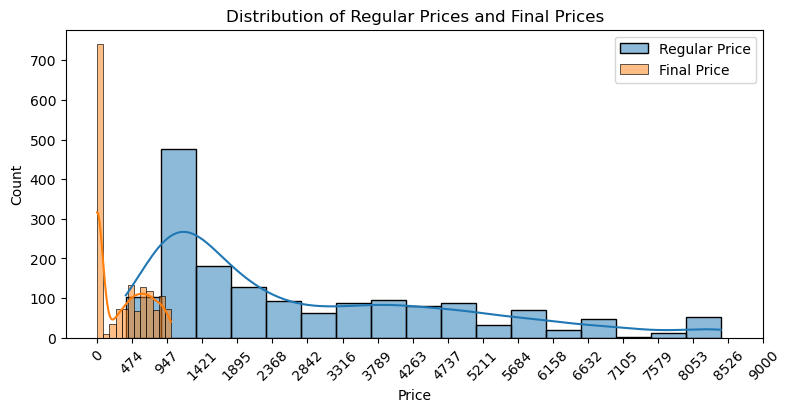

Mean Regular Price: 2805.5693160813307
Mean Final Price: 331.9895255699322


In [39]:
# 7. What is the distribution of regular prices and final prices and are there any noticeable differences between them?

plt.figure(figsize=(9, 4))
sns.histplot(df['regular_price'], kde=True, label='Regular Price')
sns.histplot(df['final_price'], kde=True, label='Final Price')

plt.title('Distribution of Regular Prices and Final Prices')
plt.xlabel('Price')
plt.ylabel('Count')

plt.xticks(np.linspace(0,9000, 20))
plt.xticks(rotation = 45)
plt.legend()
plt.show()

regular_price_mean = df['regular_price'].mean()
final_price_mean = df['final_price'].mean()
print("Mean Regular Price:", regular_price_mean)
print("Mean Final Price:", final_price_mean)

### Insight:

* From the histogram analysis, it is evident that there is a significant disparity between the distributions of regular price and final price. The mean regular price is calculated to be 2805 rps, whereas the mean final price is considerably lower at 331 rps. This substantial difference indicates that the final price consistently undergoes a significant decrease. In simpler terms, it means that customers can expect a substantial reduction in price from the initial regular price to the final price.

* In conclusion, the observed difference in means between regular price and final price in the shoe dataset highlights a significant downward trend in pricing. This implies that customers can anticipate substantial discounts or price reductions when purchasing these shoes

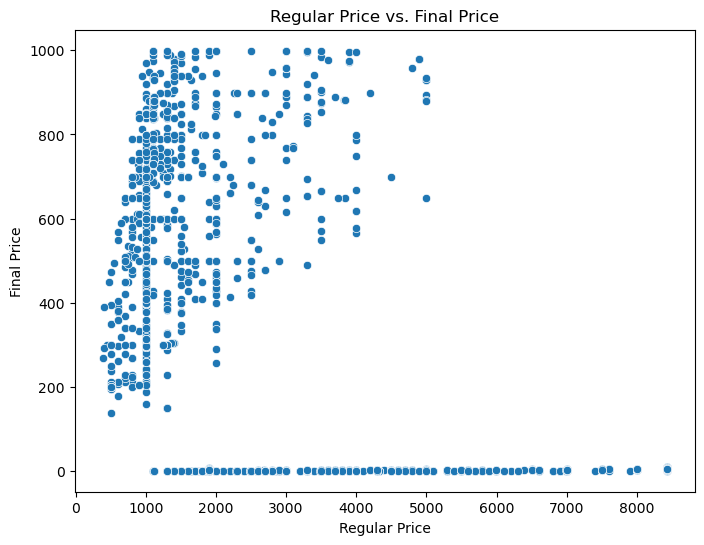

Price Correlation: -0.5694375284510039


In [40]:
# 8. What is the relationship between regular prices and final prices and can we observe any patterns or correlations?

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='regular_price', y='final_price')
plt.title('Regular Price vs. Final Price')
plt.xlabel('Regular Price')
plt.ylabel('Final Price')
plt.show()

price_correlation = df['regular_price'].corr(df['final_price'])
print("Price Correlation:", price_correlation)

### Insight

* Examination of the scatter plot demonstrates a clear connection between regular prices and final prices, and it appears to be a negative one. The correlation coefficient of -0.569 indicates that when the regular price goes up, the final price tends to go down. This means that as items become more expensive upfront, they generally end up costing less in the end. The example of a 2000 rps regular price corresponding to a final price of 250 rps illustrates this inverse relationship. Understanding these patterns can be valuable for pricing strategies and decision-making in various scenarios.

In [41]:
# 9. How does the discount percentage vary across different brands?

discount_by_brand = df.groupby('brand')[['discount_percentage']].mean()
discount_by_brand

,discount_percentage
brand,
ADIDAS,47.421648
AJANTA,58.714286
AMAZING TRADERS,40.000000
AMICO,62.200000
APIPPO,40.000000
...,...
sm footwear,79.000000
streetLOOK,52.000000
tejas,68.000000


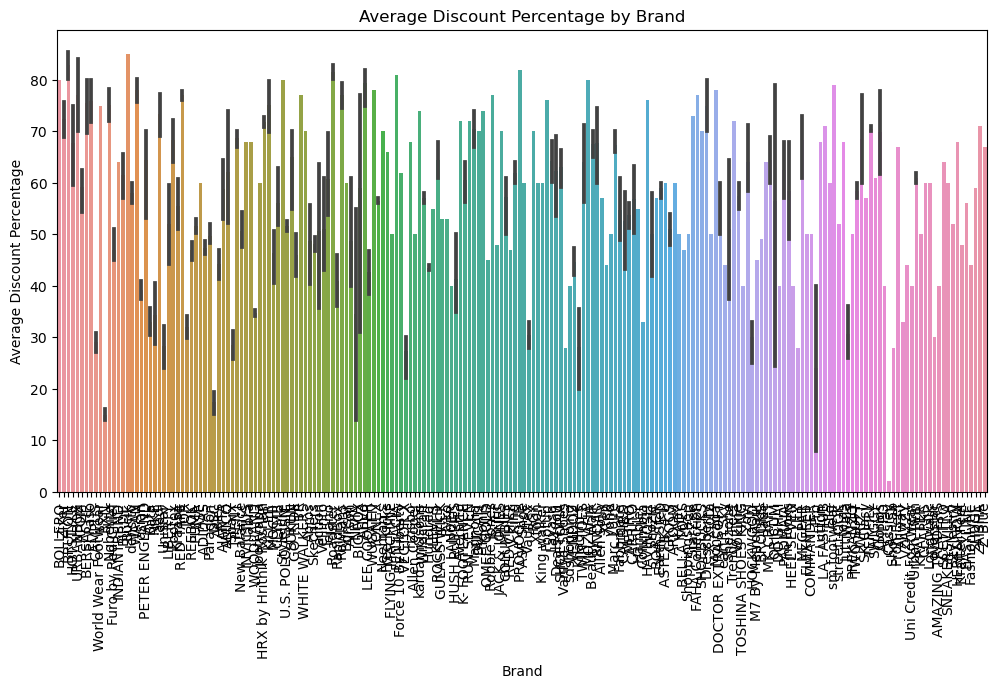

In [158]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='brand', y='discount_percentage')
plt.title('Average Discount Percentage by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Discount Percentage')
plt.xticks(rotation=90)
plt.show()

In [159]:
df['brand'].nunique()

204

### Alternative 

* Since we have a 204 brands and plotting all of them on a single plot is not feasible or readable, we can consider the following alternative:

#### Top N Brands: 

* Instead of plotting all 204 brands, we focus on the top N brands with the highest frequency or average discount percentage. This way, we can highlight the most important brands and avoid cluttering the plot.

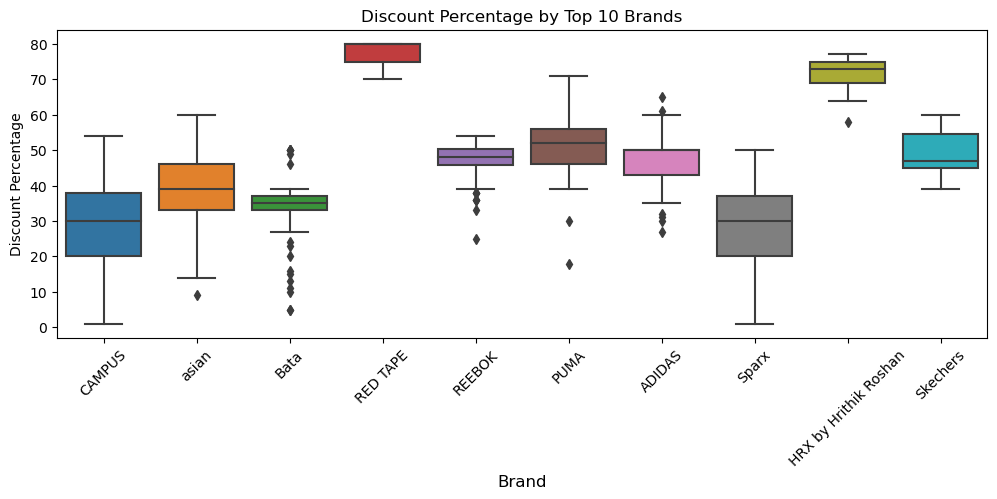

In [42]:
# Get the top 10 brands with the highest frequency

top_n_brands = df['brand'].value_counts().nlargest(10).index

# Filter the dataframe for the top N brands
df_top_brands = df[df['brand'].isin(top_n_brands)]

plt.figure(figsize=(12, 4))
sns.boxplot(data=df_top_brands, x='brand', y='discount_percentage')

plt.title(f"Discount Percentage by Top {len(top_n_brands)} Brands")
plt.xlabel('Brand', size = 12)
plt.ylabel('Discount Percentage')

plt.xticks(rotation=45)
plt.show()

### Insight:

* From the insights derived from the boxplots, distinct patterns emerge in the discount distribution among various brands. For the Campus brand, half of the discounts fall within the range of 20 to 38. Conversely, the Asian brand exhibits a broader range, with 50% of its discounts spanning from 37 to 45, indicating a comparatively more generous discount distribution than Campus.

* On the other hand, the Bata brand presents a diverse picture, with outliers suggesting occasional minimal discounts as low as 2 and occasional substantial discounts as high as 51. However, the central 50% of its discounts cluster within the range of 36 to 39, portraying a more concentrated distribution within this interval.

* Notably, the Red Tape brand stands out for offering the highest discounts, with 50% of its discounts concentrated between 72 to 80. Following closely, HRX by Hrithik Roshan secures the second-highest position in discount offerings, with its central 50% ranging from 70 to 78. These insights provide valuable information for consumers and businesses alike in understanding the discount landscapes of different brands.

In summary, our analysis of discount distributions across various shoe brands unveils diverse strategies. Campus and Asian brands maintain moderate and varied ranges, respectively, while Bata displays a mix of minimal and substantial discounts. Red Tape and HRX emerge as leaders, offering the highest discounts. These insights empower stakeholders to make informed decisions in the dynamic landscape of footwear marketing and pricing.

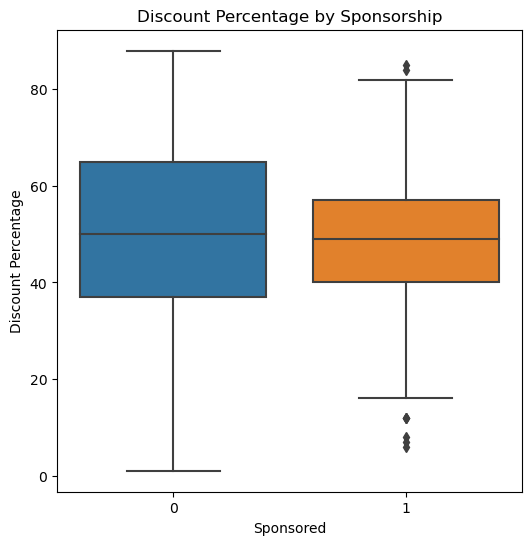

,discount_percentage
sponsored,
0,50.159861
1,48.569996


In [45]:
# 10. Is there any relationship between sponsorship and the discount percentage and are sponsored products more likely to have higher or lower discounts?

plt.figure(figsize=(6, 6))
sns.boxplot(data=df, x='sponsored', y='discount_percentage')
plt.title('Discount Percentage by Sponsorship')
plt.xlabel('Sponsored')
plt.ylabel('Discount Percentage')
plt.show()

sponsored_discount_mean = df.groupby('sponsored')[['discount_percentage']].mean()
sponsored_discount_mean

### Insight:

we can gather insights about the discount percentages based on whether the shoes are sponsored or non-sponsored.

* Sponsored shoes: The boxplot indicates that sponsored shoes generally have lower discount percentages. The 50% range for sponsored shoes falls between 42 to 55. This suggests that sponsored shoes tend to offer relatively moderate discounts compared to non-sponsored shoes.

* Non-sponsored shoes: On the other hand, the boxplot reveals that non-sponsored shoes have higher discount percentages. The 50% range for non-sponsored shoes is broader, ranging between 38 to 64. This indicates that non-sponsored shoes tend to provide a wider range of discounts, including both moderate and higher discount percentages.

Overall, the boxplot analysis highlights a contrast in discount percentages between sponsored and non-sponsored shoes. Sponsored shoes generally offer lower discount percentages, while non-sponsored shoes tend to have a wider range of discount percentages, including higher discounts.

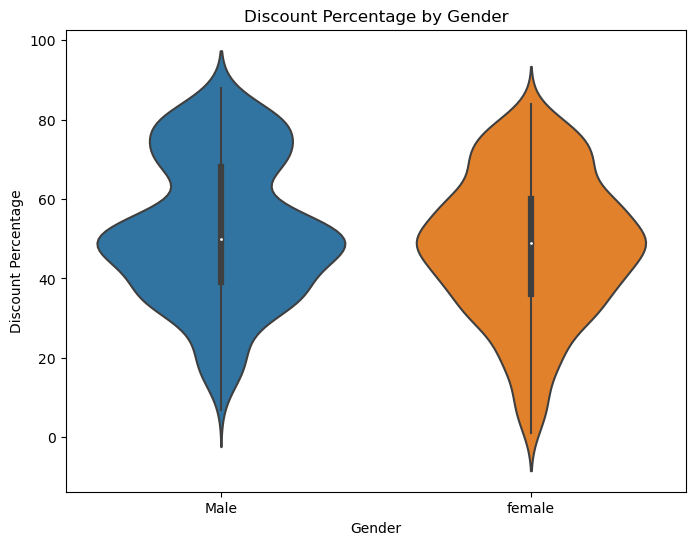

discount_percentage                                                   
                     count       mean        std  min   25%   50%   75%   max
gender                                                                       
Male                 837.0  51.974862  17.956175  7.0  39.0  50.0  68.0  88.0
female               786.0  47.911547  17.846150  1.0  36.0  49.0  60.0  84.0

In [157]:
# 11. What is the distribution of discount percentages for each gender category and are there any differences or patterns between them?

plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='gender', y='discount_percentage')
plt.title('Discount Percentage by Gender')
plt.xlabel('Gender')
plt.ylabel('Discount Percentage')
plt.show()

discount_by_gender = df.groupby('gender')[['discount_percentage']].describe()
discount_by_gender

### Insight:

* The analysis of violin plots reveals a distinct pattern in the distribution of discount percentages between male and female shoppers. Notably, the discount range for male shoes is higher, with the lowest discount observed at 7% compared to 1% for females. Similarly, the highest discount percentage for male shoes reaches 88%, while for females, it is slightly lower at 84%. This discrepancy suggests that, on average, male shoes tend to have higher discount percentages.

A potential explanation for this pattern is that females, who are observed to purchase shoes more frequently, may experience lower discount rates, reflecting a higher demand. In contrast, the higher discount rates for male shoes could be attributed to a relatively lower frequency of shoe purchases among males. 

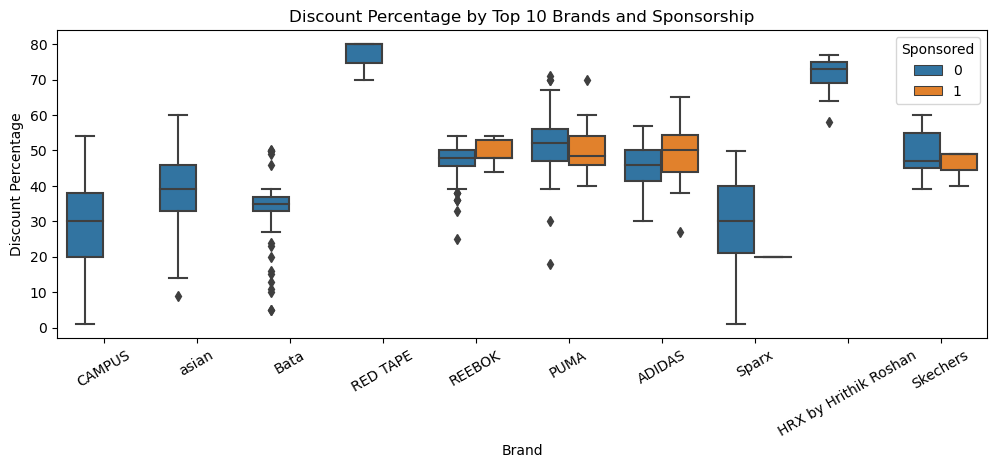

discount_percentage
brand                 sponsored                     
CAMPUS                0                    28.992768
PUMA                  0                    51.706161
                      1                    50.312500
asian                 0                    39.184000
ADIDAS                0                    46.396825
                      1                    48.825210
Sparx                 0                    28.651590
                      1                    20.000000
Skechers              0                    48.179104
                      1                    46.000000
RED TAPE              0                    76.983333
HRX by Hrithik Roshan 0                    71.875000
Bata                  0                    33.034164
REEBOK                0                    46.604651
                      1                    49.400000

In [198]:
# 12. How does the discount percentage vary across different brands and sponsorship levels? 

# Get the top 10 brands with the highest frequency
top_n_brands = df['brand'].value_counts().nlargest(10).index

# Filter the dataframe for the top N brands
df_top_brands = df[df['brand'].isin(top_n_brands)]

plt.figure(figsize=(12, 4))
sns.boxplot(data=df_top_brands, x='brand', y='discount_percentage', hue='sponsored')

plt.title(f"Discount Percentage by Top {len(top_n_brands)} Brands and Sponsorship")
plt.xlabel('Brand')
plt.ylabel('Discount Percentage')
plt.xticks(rotation=30)
plt.legend(title='Sponsored')
plt.show()

df_grouped = df.groupby(['brand', 'sponsored'])[['discount_percentage']].mean()  # or median()
df_grouped.loc[top_n_brands]

### Insight:

* The examination of the box plot highlights an interesting trend regarding sponsored plots, indicating that they tend to offer higher discounts. However, it's essential to note that the 50% range for their discount is comparatively narrower. Despite this observation, caution is warranted in drawing general conclusions, as a negative relationship between sponsorship and discount percentage has been already observed in previous visuals. This implies that, on average, sponsored brands are associated with lower discount percentages, contradicting the initial impression derived solely from the box plot analysis.

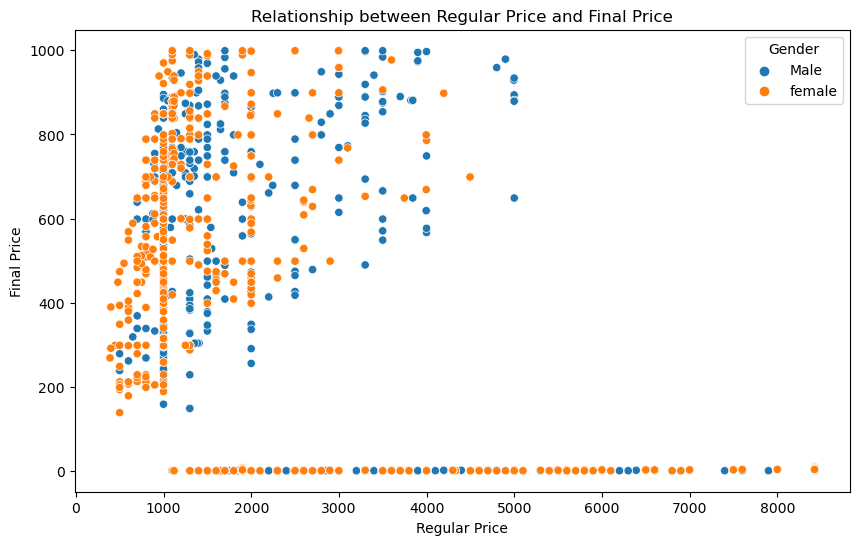

Correlation between Regular Price and Final Price (Total): -0.5694375284510039
Correlation between Regular Price and Final Price (Male): -0.5043870525659421
Correlation between Regular Price and Final Price (Female): -0.6378226730562425


In [202]:
# 13. Is there a relationship between the regular price and the final price and how does this relationship differ based on gender?

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='regular_price', y='final_price', hue='gender')

plt.title('Relationship between Regular Price and Final Price')
plt.xlabel('Regular Price')
plt.ylabel('Final Price')
plt.legend(title='Gender')
plt.show()   

# Calculate correlation coefficient for the entire dataset
correlation_total = df['regular_price'].corr(df['final_price'])
print("Correlation between Regular Price and Final Price (Total):", correlation_total)

# Calculate correlation coefficient separately for each gender

correlation_male = df[df['gender'] == 'Male']['regular_price'].corr(df[df['gender'] == 'Male']['final_price'])
correlation_female = df[df['gender'] == 'female']['regular_price'].corr(df[df['gender'] == 'female']['final_price'])
print("Correlation between Regular Price and Final Price (Male):", correlation_male)
print("Correlation between Regular Price and Final Price (Female):", correlation_female)

### Insight:

* When examining the scatter plots for male and female shoes, a discernible pattern emerges. For male shoes, the points on the scatter plot exhibit a scattered yet downward trend, reflecting the moderate negative correlation of approximately -0.504. This suggests that as the regular price increases, the corresponding final price generally decreases to some degree.

* In contrast, the scatter plot for female shoes reveals a more pronounced downward trend, aligning with the stronger negative correlation of approximately -0.638. This indicates a clearer inverse relationship between regular and final prices for female shoes. The tighter clustering of points along the descending trendline suggests that changes in regular prices exert a more significant impact on final prices for female shoes than for their male counterparts.

<Axes: >

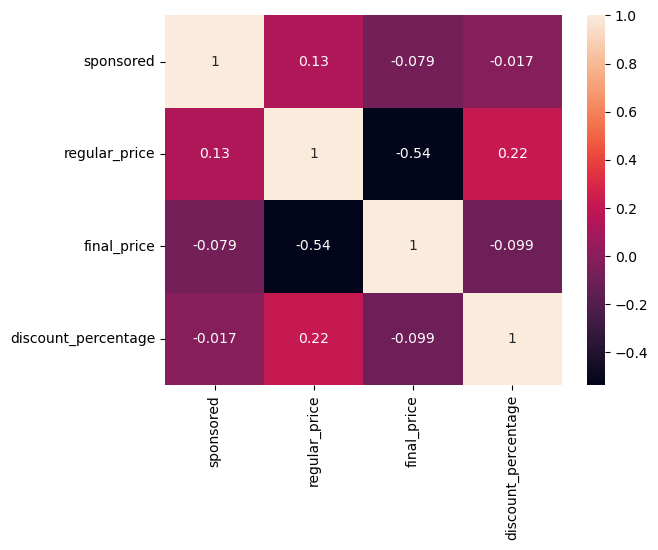

In [248]:
# 14. How does the correlation between numeric variables in the DataFrame 'df' appear in a heatmap visualization?

sns.heatmap(df.corr(numeric_only=True),annot=True)   

### Insight:

Sponsored with Regular Price (0.13): There is a weak positive correlation (0.13) between sponsorship and regular price, suggesting that, on average, sponsored items tend to have slightly higher regular prices.

Sponsored with Final Price (-0.079): There is a weak negative correlation (-0.079) between sponsorship and final price, indicating that, on average, sponsored items may have slightly lower final prices.

Sponsored with Discount Percentage (-0.017): There is a very weak negative correlation (-0.017) between sponsorship and discount percentage, implying that sponsorship is not significantly associated with the discount percentage.

Regular Price with Final Price (-0.54): There is a moderate negative correlation (-0.54) between regular price and final price, indicating that, as the regular price increases, the final price tends to decrease.

Regular Price with Discount Percentage (0.22): There is a moderate positive correlation (0.22) between regular price and discount percentage, suggesting that higher regular prices are associated with higher discount percentages.

Final Price with Discount Percentage (-0.099): There is a weak negative correlation (-0.099) between final price and discount percentage, indicating a slight tendency for higher final prices to be associated with lower discount percentages.

### From Data Gaps To Expansion:

The website currently lacks essential features such as tracking the number of sales per brand, monitoring sales by month, capturing customer reviews, and categorizing products by colors. These features are crucial as they enable thorough analysis and provide valuable insights. By incorporating the number of sales, Flipkart can gain a deeper understanding of customer preferences and make data-driven decisions to attract more customers and expand its business.

Furthermore, a promising future scope involves utilizing machine learning algorithms for better prediction. By leveraging advanced analytics techniques, Flipkart can enhance its forecasting capabilities, accurately anticipate customer demands, optimize inventory management, and improve overall operational efficiency. This integration of machine learning would further strengthen Flipkart's competitive edge in the market and enable it to stay ahead in the rapidly evolving e-commerce landscape.

  



In [59]:
# cleaned dataset

df.to_csv('C:\\Users\\KIIT\OneDrive - kiit.ac.in\Desktop\Books\AI-ML\Innomatics_Python\Datasets\cleaned_shoes_data.csv', index = False)
df

,brand,sponsored,regular_price,final_price,discount_percentage,product_description,gender
0,BOLLERO,1,3499.0,666.000000,80.0,Men's Grey High Top Shoes High Tops For Men,Male
1,Zixer,1,2999.0,615.000000,79.0,Men's High Top Ankle Retro Air Original Sneake...,Male
2,BRUTON,0,1299.0,299.000000,76.0,Trendy Running Shoes Running Shoes For Men,Male
3,HOTSTYLE,0,999.0,239.000000,76.0,Trendy & Stylish Running Shoes For Men,Male
4,BRUTON,0,1299.0,229.000000,82.0,Modern Trendy Sneakers Shoes Sneakers For Men,Male
...,...,...,...,...,...,...,...
1995,ORICUM,0,999.0,229.000000,77.0,Oricum Casual Walking Gym Training outdoor sne...,female
1996,Z Blue,0,4999.0,331.989526,67.0,NEW Z BLUE OGIY RETRO SHOES HIGH PREMIUM QUALI...,female
1997,Skechers,0,5999.0,331.989526,45.0,GO WALK JOY -WONDERFUL SPRING Sneakers For Women,female
1998,RED TAPE,0,5599.0,331.989526,70.0,Walking Sports Shoes for Women | Soft Cushione...,female
